In [35]:
import sys
import random
from pprint import pprint

import pandas as pd
import numpy as np
import pyLDAvis.gensim
import pyLDAvis
import matplotlib.pyplot as plt

from twitpol import config, language, topic_modelling

if '..' not in sys.path:
    sys.path.append('..')
    
from src.supp_analysis import topic_modelling_and_collocation as tmac

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
nlp = language.get_nlp()

In [4]:
corpus = tmac.load_corpus()

/Users/benjaminlevy/anaconda/envs/twitpol-env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3979785, 4)


In [5]:
corpus.head()

,tweet,nlikes,DateTime,Sentiment
0,"Yes, I agree the workday should be shortened, ...",1.0,2019-11-07,0.503561
1,People think that businesses care more about p...,4.0,2019-11-07,0.740527
2,"@amyklobuchar is rising, surging past Kamala H...",0.0,2019-11-07,0.909588
3,I truly hope so. All this outrage and fake hea...,1.0,2019-11-07,0.222077
4,"She did, and I like Kamala. But @JulianCastro ...",244.0,2019-11-07,0.544374


In [6]:
corpus = tmac.match_to_candidates(corpus)

  0%|          | 0/3979785 [00:00<?, ?it/s]

Checking if tweets match SANDERS


  0%|          | 6868/3979785 [00:00<00:57, 68678.59it/s]

Checking if tweets match HARRIS


  0%|          | 11614/3979785 [00:00<00:34, 116139.83it/s]

Checking if tweets match BIDEN


  0%|          | 5461/3979785 [00:00<01:12, 54608.88it/s]

Checking if tweets match BUTTIGIEG


  0%|          | 4221/3979785 [00:00<01:34, 42209.64it/s]

Checking if tweets match BOOKER


  0%|          | 5087/3979785 [00:00<01:18, 50869.56it/s]

Checking if tweets match OROURKE


  0%|          | 1/3979785 [00:00<142:07:08,  7.78it/s]

Checking if tweets match WARREN


100%|██████████| 3979785/3979785 [00:10<00:00, 391439.31it/s]


In [7]:
len(corpus[corpus['OROURKE']])

77392

In [8]:
corpus.sample(10)[['tweet', 'SANDERS', 'HARRIS', 'BIDEN', 'BUTTIGIEG', 'BOOKER', 'OROURKE', 'WARREN']]

,tweet,SANDERS,HARRIS,BIDEN,BUTTIGIEG,BOOKER,OROURKE,WARREN
124139,"Yes, Bernie - I agree with you. Now, exit sta...",True,False,False,False,False,False,False
358478,? We need to end corruption in politics \n\n? ...,False,True,False,False,False,False,False
726695,“Fair share” still won’t be enough to pay for ...,False,False,False,False,False,False,False
110511,"Authenic? Yeah, Joe ""May I speak to your lobby...",False,False,True,False,False,False,False
976345,Yes!! \n\nI’m a Bernie supporter. I hope the P...,True,False,False,False,False,False,False
84806,The precedent has been set...do release your t...,True,False,False,False,False,False,False
443134,"No, Joe. pic.twitter.com/IyM5Fk83Y1",False,False,False,False,False,False,False
815859,Democrats hate Tulsi. Tulsi has the support of...,False,True,False,False,False,False,False
485896,I’m more shocked Mr Weeks is making sense!!?!!...,False,True,False,False,False,False,False
756296,Joe Biden said that Donald Trump’s tweets are ...,False,False,True,False,False,False,False


In [9]:
sanders = corpus[corpus['SANDERS']].sample(10000)
docs = language.make_docs(sanders['tweet'], nlp, notebook=True)

/Users/benjaminlevy/Desktop/Benjamin/School/19_20/Classes/ac209a/project/twitter-polling/twitpol/twitpol/language.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  return [nlp(doc) for doc in pbar(docs)]


In [10]:
random.choice(docs)

['stupid',
 'reason',
 'something',
 'call',
 'working',
 'families',
 'party',
 'not',
 'endorse',
 'candidate',
 'work',
 'work',
 'family',
 'stupid',
 'argument',
 'fool',
 'tell',
 'like',
 'bernie',
 'not',
 'win',
 'bernieyellsforus']

In [11]:
bow, vocab = topic_modelling.make_bow(docs)

In [12]:
model = topic_modelling.run_lda(bow, vocab, num_topics=10)

In [13]:
model.print_topics()

[(0,
  '0.046*"bernie" + 0.046*"  " + 0.041*"sanders" + 0.027*"   " + 0.023*"$" + 0.020*"biden" + 0.018*"\xa0  " + 0.015*"poll" + 0.014*"via" + 0.014*"joe"'),
 (1,
  '0.015*"omar" + 0.010*"happy" + 0.010*"ilhan" + 0.008*"birthday" + 0.008*".@berniesanders" + 0.006*"@ninaturner" + 0.006*"los" + 0.005*"court" + 0.005*"iran" + 0.005*"shirt"'),
 (2,
  '0.039*"warren" + 0.032*"bernie" + 0.031*"kamala" + 0.027*"pete" + 0.025*"biden" + 0.024*"sanders" + 0.024*"harris" + 0.024*"elizabeth" + 0.016*"joe" + 0.016*"beto"'),
 (3,
  '0.052*"  " + 0.044*"   " + 0.038*"@berniesander" + 0.016*"bernie" + 0.012*"joe" + 0.011*"@ewarren" + 0.011*"@berniesanders" + 0.011*"biden" + 0.009*"@joebiden" + 0.009*"@kamalaharris"'),
 (4,
  '0.070*"bernie" + 0.049*"not" + 0.013*"vote" + 0.013*"like" + 0.013*"get" + 0.012*"would" + 0.011*"people" + 0.010*"trump" + 0.010*"  " + 0.010*"go"'),
 (5,
  '0.014*"school" + 0.011*"release" + 0.011*"|" + 0.010*"return" + 0.009*"large" + 0.009*"cortez" + 0.008*"education" + 0.0

Now for Harris

In [21]:
harris = corpus[corpus['HARRIS']].sample(10000)
docs_harris = language.make_docs(harris['tweet'], nlp, notebook=True)
print(random.choice(docs_harris))
bow_harris, vocab_harris = topic_modelling.make_bow(docs_harris)
model_harris = topic_modelling.run_lda(bow_harris, vocab_harris, num_topics=10)
pprint(model_harris.print_topics())

/Users/benjaminlevy/Desktop/Benjamin/School/19_20/Classes/ac209a/project/twitter-polling/twitpol/twitpol/language.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  return [nlp(doc) for doc in pbar(docs)]



['put', 'self', 'risk', 'kamala', 'need', 'burn', 'one', 'relax']
[(0,
  '0.062*"kamala" + 0.040*"not" + 0.033*"  " + 0.023*"harris" + 0.015*"   " + '
  '0.010*"trump" + 0.009*"get" + 0.008*"like" + 0.008*"go" + 0.008*"say"'),
 (1,
  '0.048*"warren" + 0.045*"biden" + 0.040*"kamala" + 0.034*"bernie" + '
  '0.033*"joe" + 0.033*"elizabeth" + 0.033*"pete" + 0.029*"harris" + '
  '0.022*"beto" + 0.021*"sanders"'),
 (2,
  '0.089*"kamala" + 0.081*"  " + 0.064*"harris" + 0.061*"   " + 0.011*"trump" '
  '+ 0.009*"\'s" + 0.009*"’s" + 0.007*"via" + 0.006*"say" + 0.005*"twitter"'),
 (3,
  '0.011*"camp" + 0.010*"awesome" + 0.009*"c" + 0.007*"brain" + 0.006*"b" + '
  '0.006*"14" + 0.006*"popular" + 0.006*"ability" + 0.005*"update" + '
  '0.005*"multiple"'),
 (4,
  '0.060*"kamala" + 0.035*"not" + 0.024*"would" + 0.016*"good" + 0.014*"think" '
  '+ 0.012*"woman" + 0.011*"president" + 0.009*"one" + 0.009*"harris" + '
  '0.009*"great"'),
 (5,
  '0.020*"de" + 0.011*"que" + 0.009*"character" + 0.008*"moth

In [20]:
np.sum(np.logical_and(corpus['SANDERS'], corpus['BIDEN']))

125702

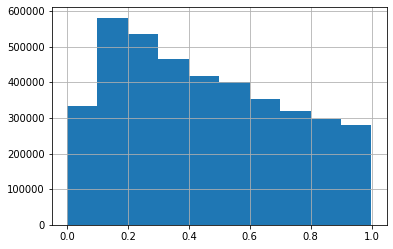

In [25]:
corpus['Sentiment'].hist()

In [26]:
# Looking only at very positive and very negative tweets

In [54]:
def topic_model(corpus):
    docs = language.make_docs(corpus['tweet'], nlp, notebook=True, extra_stop=extra_stop)
    print(random.choice(docs))
    bow, vocab = topic_modelling.make_bow(docs)
    model = topic_modelling.run_lda(bow, vocab, num_topics=10)
    pprint(model.print_topics())

In [57]:
warren = corpus[corpus['WARREN']]
warren_pos = warren[warren['Sentiment'] > 0.8].sample(10000)
warren_neg = warren[warren['Sentiment'] < 0.2].sample(10000)
for groupname, corp in [('POS', warren_pos), ('NEG', warren_neg)]:
    print(f'Topic model WARREN - {groupname}')
    topic_model(corp)

Topic model WARREN - POS


/Users/benjaminlevy/Desktop/Benjamin/School/19_20/Classes/ac209a/project/twitter-polling/twitpol/twitpol/language.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



['join', 'support', 'elizabeth', 'via', '@actblue', 'https://secure.actblue.com/donate/ew-corporate-tax', '   ']
[(0,
  '0.038*"bernie" + 0.033*"sanders" + 0.032*"elizabeth" + 0.031*"biden" + '
  '0.031*"kamala" + 0.029*"harris" + 0.027*"joe" + 0.025*"booker" + '
  '0.022*"pete" + 0.020*"beto"'),
 (1,
  '0.072*"pete" + 0.071*"kamala" + 0.068*"harris" + 0.052*"elizabeth" + '
  '0.048*"mayor" + 0.023*"love" + 0.016*"buttigieg" + 0.014*"like" + '
  '0.011*"also" + 0.009*"would"'),
 (2,
  '0.039*"elizabeth" + 0.025*"bernie" + 0.021*"  " + 0.020*"kamala" + '
  '0.019*"biden" + 0.018*"2" + 0.017*"3" + 0.017*"sanders" + 0.016*"harris" + '
  '0.016*"democratic"'),
 (3,
  '0.008*"explain" + 0.008*"robert" + 0.008*"ma" + 0.007*"e" + '
  '0.007*"especially" + 0.007*"school" + 0.007*"around" + 0.006*"yesterday" + '
  '0.006*"@msnbc" + 0.005*"republican"'),
 (4,
  '0.143*"elizabeth" + 0.079*"   " + 0.068*"via" + 0.068*"support" + '
  '0.056*"join" + 0.051*"@actblue" + 0.048*"  " + 0.012*"\xa0  " +

/Users/benjaminlevy/Desktop/Benjamin/School/19_20/Classes/ac209a/project/twitter-polling/twitpol/twitpol/language.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



['claim', 'not', 'socialist', 'probably', 'communist', 'like', 'puppet', 'master', 'george', 'soros', 'two', 'presidential', 'candidates', 'elizabeth', 'kamala', 'harris', 'muslim', 'brotherhood', 'communist', 'party', 'tie', 'run', 'president', '  ', 'https://www.thecommonsenseshow.com/two-presidential-candidates-with-muslim-brotherhood-and-communist-party-ties-are-running-for-president/', '   ']
[(0,
  '0.018*"rally" + 0.015*"trump" + 0.012*"percent" + 0.010*"test" + '
  '0.007*"dna" + 0.007*"hill" + 0.006*"corruption" + 0.006*"hopeful" + '
  '0.006*"strike" + 0.006*"potential"'),
 (1,
  '0.051*"elizabeth" + 0.039*"  " + 0.037*"   " + 0.033*"american" + '
  '0.026*"native" + 0.011*"lie" + 0.010*"claim" + 0.008*"trump" + 0.007*"\'s" '
  '+ 0.007*"no"'),
 (2,
  '0.052*"not" + 0.030*"elizabeth" + 0.018*"bernie" + 0.012*"get" + '
  '0.012*"like" + 0.011*"go" + 0.010*"would" + 0.010*"no" + 0.009*"say" + '
  '0.009*"people"'),
 (3,
  '0.089*"  " + 0.088*"elizabeth" + 0.083*"   " + 0.023*"

In [30]:
corpus.head()

,tweet,nlikes,DateTime,Sentiment,SANDERS,HARRIS,BIDEN,BUTTIGIEG,BOOKER,OROURKE,WARREN
0,"Yes, I agree the workday should be shortened, ...",1.0,2019-11-07,0.503561,False,True,False,False,False,False,False
1,People think that businesses care more about p...,4.0,2019-11-07,0.740527,False,False,False,False,False,False,False
2,"@amyklobuchar is rising, surging past Kamala H...",0.0,2019-11-07,0.909588,False,True,False,False,False,False,False
3,I truly hope so. All this outrage and fake hea...,1.0,2019-11-07,0.222077,False,True,False,False,False,False,False
4,"She did, and I like Kamala. But @JulianCastro ...",244.0,2019-11-07,0.544374,False,True,False,False,False,False,False


In [45]:
queries = tmac.load_and_split_queries()
extra_stop = [q.lower() for q in queries['WARREN']]


In [46]:
extra_stop

['elizabeth warren',
 'warren',
 'senwarren',
 'senator warren',
 'elizabethwarren']

In [47]:
tmac.topic_model_corpus(warren_pos, nlp, extra_stop)


0it [00:00, ?it/s]


ValueError: cannot compute LDA over an empty collection (no terms)

In [59]:
pd.read_csv(config.DATA / 'processed' / 'tweets_matched.csv').head()

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.
